In [2]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
variable = np.linspace(1, 10, 100)
value = 2*variable**2 + variable + 0.7

basis = [variable**2, variable, 1 + variable * 0, 1/(1+1/(variable/(3*variable+1)+2))]
#basis = [variable**2, variable, 1 + variable * 0]
#basis = [variable**2, variable, np.sin(variable)]

#print(value)
#print(basis)

basis_value = np.array(basis)

#print(basis_value)

In [4]:
# Sequential approximation method

def SA (variable, value, basis_value, c, prob_type):
    
    """ Use sequantial approximation to find the coefficients with noiseless data
    Input: 
    - *variable* (ndarray) - sample points x
    - *value* (ndarray) - data at given sample points x 
    - *basis_value* (ndarray) - basis at given sample points x
    - *c* (ndarray) - initial guess of coefficients   
    - *prob_type* (str) - type of probability used in choosing x
    Output: 
    - *c* (ndarray) - coefficients at final iteration
    """
    
    success = False
    MAX_ITERATION = 5000
    tolerance = 0.001

    # Create probability for randomly choosing variable
    prob = []
    s = 0
    for j in range (len(variable)):
        if prob_type == 'uniform':
            prob.append(1)
            s += 1
        if prob_type == 'height':
            prob.append(np.linalg.norm(basis_value[:,j], ord=2)**2)
            s += np.linalg.norm(basis_value[:,j], ord=2)**2


    prob = np.array(prob)/s


    for i in range (MAX_ITERATION):
      
      # Randomly choose index k, then use x[k] as a training point (with replacement)
        k = int(np.random.choice(np.linspace(0, len(variable)-1, len(variable)), p = prob))
       
      # Choose index k which has largest error
#         est = np.dot(c, basis_value)
#         k = list(value-est).index(max(abs(value-est)))
        
        
      # Kick out the values which are not array
        if not(type(basis_value[:,k]) is np.ndarray and not np.isnan(basis_value[:,k]).any()):
            continue
            
            
        c_dot_phi = np.dot(c, basis_value[:,k])

        phi_norm_square = np.linalg.norm(basis_value[:,k], ord=2) **2

        frac = ((value[k] - c_dot_phi) / phi_norm_square) * basis_value[:,k]
        c = np.add(c, frac, dtype=float)


      # Stopping criteria, compare the error between true solution and estimation
        est = np.dot(c, basis_value)
        if max(abs(value-est)) < tolerance:
            success = True
            break 

    if success:
        return c
    else:
#        print("Iteration did not converge.")
        return c



In [5]:
# Initial guess of coefficients
c_init = np.random.uniform(0, 2, size=len(basis_value))

# Coefficients from SA
c = SA(variable, value, basis_value, c_init, 'uniform')

# Estimations for each value
est = np.dot(c, basis_value)
print("coefficient is", c)

#print("estimation is", est)
#print("value is", value)
print("error is", value-est)
print("max error", max(abs(value-est)), "min error", min(abs(value-est)))
print("error norm is", np.linalg.norm(value-est, ord=2))


coefficient is [ 2.00006933  0.99992092  1.05556018 -0.51251636]
error is [-7.31408069e-04 -4.79721428e-04 -2.60797311e-04 -6.91530659e-05
  9.94955617e-05  2.48544900e-04  3.80722049e-04  4.98241977e-04
  6.02922350e-04  6.96268788e-04  7.79539071e-04  8.53792121e-04
  9.19925808e-04  9.78706446e-04  1.03079203e-03  1.07675075e-03
  1.11707574e-03  1.15219717e-03  1.18249190e-03  1.20829153e-03
  1.22988900e-03  1.24754404e-03  1.26148777e-03  1.27192652e-03
  1.27904508e-03  1.28300942e-03  1.28396904e-03  1.28205898e-03
  1.27740147e-03  1.27010748e-03  1.26027795e-03  1.24800492e-03
  1.23337245e-03  1.21645752e-03  1.19733072e-03  1.17605691e-03
  1.15269581e-03  1.12730246e-03  1.09992771e-03  1.07061857e-03
  1.03941862e-03  1.00636827e-03  9.71505049e-04  9.34863882e-04
  8.96477291e-04  8.56375605e-04  8.14587144e-04  7.71138376e-04
  7.26054071e-04  6.79357435e-04  6.31070230e-04  5.81212883e-04
  5.29804591e-04  4.76863408e-04  4.22406333e-04  3.66449381e-04
  3.09007659e-04

In [12]:
Err = []
max_error = []

num = 10000
bin_num = 5

variable1 = np.linspace(91, 100, 100)
#value = 2*variable**2 + variable + 0.7

#basis = [variable**2, variable, 1 + variable * 0, 1/(1+1/(variable/(3*variable+1)+2))]

In [13]:
error1 = []
for i in range (num):
    c_init = np.random.uniform(0, 2, size=len(basis_value))
    c1 = SA(variable1, value, basis_value, c_init, 'uniform')
    est1 = np.dot(c1, basis_value)
    error1.append(np.linalg.norm(value - est1, ord=2))
    max_error.append(max(abs(value-est1)))

Err.append(['91-100 uniform x',error1])

#print("estimate is", estimate)
#print("value is", value)

In [14]:
error2 = []
for i in range (num):
    c_init = np.random.uniform(0, 2, size=len(basis_value))
    c2 = SA(variable1, value, basis_value, c_init, 'height')
    est2 = np.dot(c2, basis_value)
    error2.append(np.linalg.norm(value - est2, ord=2))
    max_error.append(max(abs(value-est2)))

Err.append(['91-100 height y',error2])

In [15]:
variable2 = np.linspace(1, 10, 100)

error3 = []
for i in range (num):
    c_init = np.random.uniform(0, 2, size=len(basis_value))
    c3 = SA(variable2, value, basis_value, c_init, 'uniform')
    est3 = np.dot(c3, basis_value)
    error3.append(np.linalg.norm(value - est3, ord=2))
    max_error.append(max(abs(value-est3)))

Err.append(['1-10 uniform x',error3])

In [16]:
error4 = []
for i in range (num):
    c_init = np.random.uniform(0, 2, size=len(basis_value))
    c4 = SA(variable2, value, basis_value, c_init, 'height')
    est4 = np.dot(c4, basis_value)
    error4.append(np.linalg.norm(value - est4, ord=2))
    max_error.append(max(abs(value-est4)))

Err.append(['1-10 height y',error4])


# print("max error is", max(max_error))
#print("max error is", max_error)

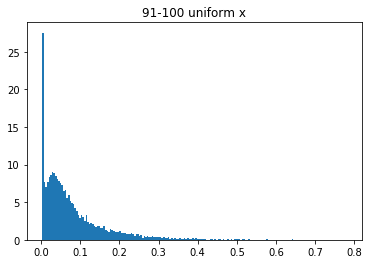

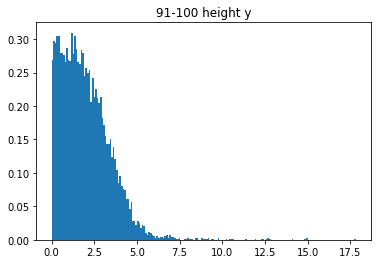

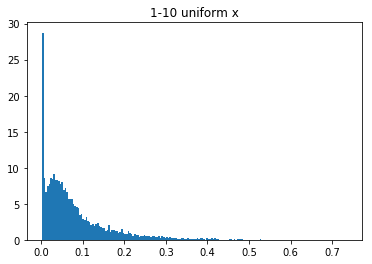

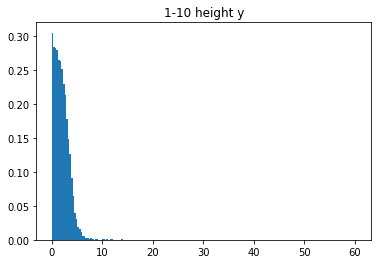

In [25]:
#print("Err is", Err)
for i in range (len(Err)):
    plt.hist(Err[i][1], bins = np.sqrt(3.6*num).astype(int), density = True)
    plt.title(Err[i][0])
    plt.show()